In [1]:
import numpy as np
from math import *
π = np.pi
import scipy.special as ss
import scipy.integrate as sint
import mpmath
import matplotlib.pyplot as plt
import pandas as pd
import os
from common import *

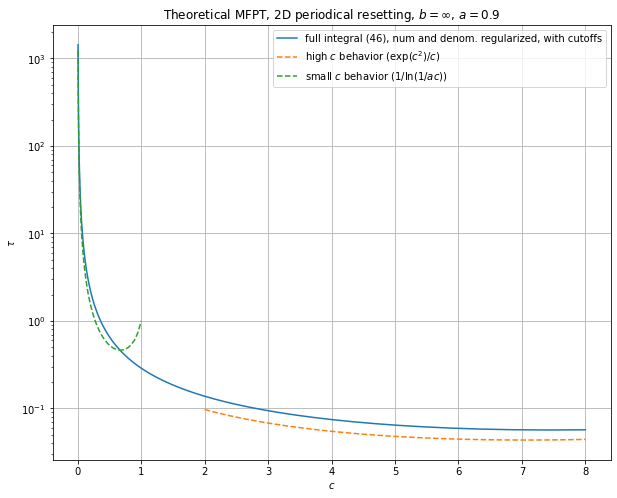

In [2]:
plt.figure(figsize=(10,8))

a = 0.9

c = np.logspace(-8, 3, 100, base=2)
plt.semilogy(c, fpt_2d_periodical_tau(np.inf,c,a), label="full integral (46), num and denom. regularized, with cutoffs")

c = np.linspace(2, 8, 100)
tau_large_c = np.sqrt(π/a)*(1-a)/c * np.exp(c**2*(1-a)**2)
plt.semilogy(c, tau_large_c, '--', label=r"high $c$ behavior ($\exp(c^2)/c$)")

c = np.logspace(-8, 0, 100, base=2)
tau_small_c = log(1/a) / c**2 / np.log(1/a/c)
plt.semilogy(c, tau_small_c, '--', label=r"small $c$ behavior ($1/\ln(1/ac)$)")

plt.legend()
plt.ylabel(r"$\tau$")
plt.xlabel(r"$c$")
plt.title("Theoretical MFPT, 2D periodical resetting, $b=\infty$, $a={}$".format(a))
plt.grid()
plt.savefig("th-curves/w_per_binf_a{}.pdf".format(a), bbox_inches='tight')

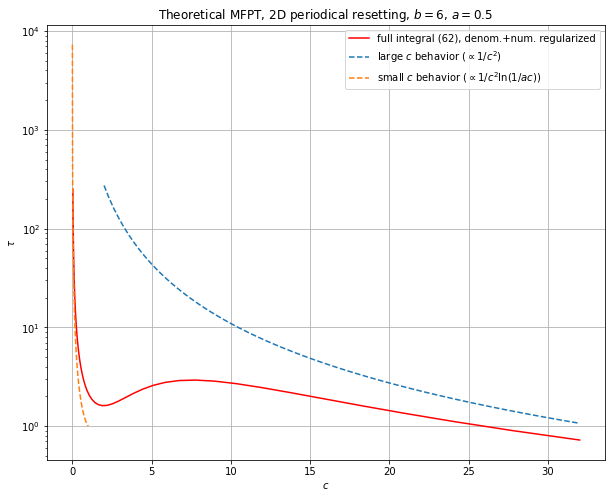

In [3]:
plt.figure(figsize=(10,8))

a = 0.5
b = 6

path = "th-cache-2d-periodical/a{:.4f}_b{:.4f}".format(a,b)
if os.path.exists(path):
    df = pd.read_csv(path, sep=',')
    c = df['c']
    tau_full_reg = df['tau']
else:
    c = np.logspace(-5, 5, 60, base=2)
    tau_full_reg = fpt_2d_periodical_tau(b,c,a)
    df = pd.DataFrame({'c':c,'tau':tau_full_reg})
    df.to_csv(path, sep=',', index=False, float_format='%.6e')
    
plt.plot(c, tau_full_reg, label="full integral (62), denom.+num. regularized", color='red')

c = np.linspace(2, 32, 100)
gm1 = sint.quad( lambda z: z * exp(-b**2/2-z**2/2) * ss.i0(b*z), 0, a*b, epsrel=1e-8, limit=1000 )[0]
tau_large_c = 1/c**2/gm1

plt.plot(c, tau_large_c, '--', label=r"large $c$ behavior ($\propto 1/c^2$)")

c = np.logspace(-8, 0, 100, base=2)
A1 = sint.quad( lambda z: z * exp(-b**2/2-z**2/2) * ss.i0(b*z) * log(z/a/b), a*b, 10+b, epsrel=1e-8, limit=1000 )[0]
tau_small_c = A1 / c**2 / np.log(1/a/c)
plt.plot(c, tau_small_c, '--', label=r"small $c$ behavior ($\propto 1/c^2\ln(1/ac)$)")

plt.yscale('log')
plt.ylabel(r"$\tau$")
plt.xlabel(r"$c$")
plt.title("Theoretical MFPT, 2D periodical resetting, $b={}$, $a={}$".format(b,a))
plt.legend()
plt.grid()
plt.savefig("th-curves/w_per_b{}_a{}.pdf".format(b,a), bbox_inches='tight')